In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Vowel.txt")
df.y = df.y - 1
features = [f'x.{i+1}' for i in range(10)]
df_train, df_test = df[df.is_train==1], df[df.is_train==0]
X_train, y_train = df_train[features].values, df_train.y.values
X_test, y_test = df_test[features].values, df_test.y.values

In [3]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
# calculate prior probabilities
pi = counts_elements/y_train.shape[0]

In [4]:
mu = [np.mean(X_train[y_train == i], axis=0) for i in range(11)]

In [5]:
W = np.zeros((10, 10))
for k in range(11):
    X_train_k = X_train[y_train == k]
    for i in range(X_train_k.shape[0]):
        d = (X_train_k[i] - mu[k]).reshape((10, 1))
        W += (d @ d.T) / (X_train.shape[0] - 11)

In [6]:
M = np.vstack(mu)

In [7]:
d, U = np.linalg.eig(W)
D = np.diag(d)

In [8]:
W_sqrt_inv = np.linalg.inv(U @ np.diag(np.sqrt(d)) @ U.T)

In [9]:
M_star = M @ W_sqrt_inv

In [10]:
M_star_mu = np.mean(M_star, axis=0)
B_star = np.zeros((10, 10))
for k in range(11):
    d = (M_star[k] - M_star_mu).reshape((10, 1))
    B_star += (d @ d.T) / 11

In [11]:
d_b_star, V = np.linalg.eig(B_star)

In [18]:
v0_star = V[:,0].reshape((10, 1))
v1_star = V[:,1].reshape((10, 1))
#v0 = W_sqrt
v0 = W_sqrt_inv @ v0_star
v1 = W_sqrt_inv @ v1_star

In [19]:
Z0 = v0.T @ X_train.T
Z1 = v1.T @ X_train.T

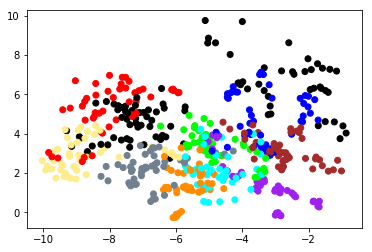

In [22]:
colors = np.array(['#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
                   '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
plt.scatter(Z0, Z1, c=colors[y_train])